In [1]:
import tensorflow as tf

if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

In [2]:
print(tf.__version__)

2.0.0


# STEP 1 : Loading Data 

**The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.**

**x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .**

**y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.**




In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(training_images, training_labels), (testing_images,testing_labels) = mnist.load_data()     

In [5]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
training_images.ndim

3

In [7]:
training_images[0].shape

(28, 28)

In [8]:
training_images.shape

(60000, 28, 28)

In [9]:
testing_images.shape 

(10000, 28, 28)

In [10]:
training_labels[0] #mtlb 0 matrix py 5 para hua ha 

5

# step 2 network architecture

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
network=models.Sequential()
network.add(layers.Dense(512,activation ='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation ='softmax'))


# step 3 network compile

In [12]:
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# step 4 preparing the image data

In [13]:
training_images=training_images.reshape((60000,28*28)) #3 dimension ko 2 dimension mein convert krna ha row and columns ko multiply kr k ek banana
training_images=training_images.astype('float32')/255 
#isse sari values jitni bhi bari value hu 0 and 1 k between ajayegi yh normalization hota ha 
#qu k bht bari range ki values ati hyn tw usko 0 and 1 k between range mein lana hota tbhi normalize(center tendency) 
# normalize mean k qareeb sari values
testing_images=testing_images.reshape((10000,28*28))
testing_images=testing_images.astype('float32')/255


# step 5 preparing the labels

In [14]:
from tensorflow.keras.utils import to_categorical
#data ki 10 category hyn tbhi data ko categorical data mein convert
#(categorical data) one hot encode teen class hyn a b c row mein bhi column  a b c tw jahan A ayega agar wahan 1 baqi har jaga 0 
#issi trhn b ka scenerio jahan b ayega srf wahan 1 baqi har jaga 0 means a and c 
training_labels=to_categorical(training_labels)
testing_labels=to_categorical(testing_labels)


# step 6 training

In [15]:
network.fit(training_images,training_labels,epochs=5,batch_size=128)
#fit jahan bhi dekho means training
#epochs means iteration
#batch_size means images ko thori thori kr k load karega ek sth load karogy tw load ayega

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.2620 - accuracy: 0.9241
Epoch 2/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.1015 - accuracy: 0.9701
Epoch 3/5
60000/60000 [==============================] - 5s 89us/sample - loss: 0.0672 - accuracy: 0.9801
Epoch 4/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0490 - accuracy: 0.9852
Epoch 5/5
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0366 - accuracy: 0.9891


In [19]:
test_loss,test_acc=network.evaluate(testing_images,testing_labels)
print('test accuracy:',test_acc)


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test accuracy: 0.9788


In [21]:
network.predict(testing_images)

array([[3.7295687e-09, 6.1042220e-11, 3.6550389e-06, ..., 9.9999011e-01,
        6.7880670e-08, 5.1250970e-07],
       [1.6987424e-09, 2.8809040e-06, 9.9999702e-01, ..., 1.8631266e-19,
        1.7407137e-08, 2.0869312e-17],
       [9.2107007e-07, 9.9768448e-01, 1.8005306e-04, ..., 1.8365157e-04,
        1.8553220e-03, 4.8863740e-06],
       ...,
       [4.5761914e-12, 3.7022247e-12, 3.5218981e-11, ..., 5.8031304e-07,
        1.0729165e-05, 1.9993038e-05],
       [8.5935606e-11, 3.8186641e-13, 1.3498985e-13, ..., 5.6991553e-13,
        2.8060969e-05, 3.1857743e-12],
       [3.4230625e-11, 6.3962290e-16, 5.6330399e-11, ..., 2.6342243e-17,
        3.8835031e-14, 7.7310611e-15]], dtype=float32)

In [28]:
from tensorflow.keras.datasets import mnist
(training_images,training_labels),(testing_images,testing_labels)=mnist.load_data()
print(training_images.ndim)
print(training_images.shape)
print(training_images.dtype)


3
(60000, 28, 28)
uint8


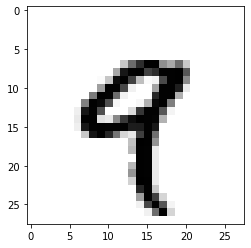

In [30]:
digit=training_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()